# Newton's method

In [40]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt
from scipy.linalg import norm
import autograd.numpy as anp
from autograd import grad, jacobian
from autograd.numpy.linalg import solve, norm

## Problem 1

In [16]:
def one_dim_newton(f, x0, fprime, tol=1e-5, maxiter=15):
    
    for i in range(int(maxiter)):
        x1 = x0 - f(x0)/fprime(x0)
        if ( np.abs(x0-x1) < tol ):
            break
        x0 = x1
    
    if ( i<maxiter-1 ):
        print("Newton's algorithm converged")
    else:
        print("Newton's algorithm did not converge")
    
    return x1

In [17]:
f = lambda x: np.exp(x)-2
fprime = lambda x: np.exp(x)
sol = one_dim_newton(f, 1, fprime)
print("My Newton's solution is: ", sol)
print("Optimize.newton's solution is: ", optimize.newton(f, 1, fprime))

Newton's algorithm converged
My Newton's solution is:  0.6931471805600254
Optimize.newton's solution is:  0.6931471805599453


## Problem 2

In [18]:
def interest(N1, N2, P1, P2):
    inter = lambda r: P1 * ((1 + r) ** N1 - 1) - P2 * (1 - (1 + r) ** -N2)
    inter1 = lambda r: P1 * N1 * (1 + r) ** (N1 - 1) + P2 * N2 * (1 + r) ** (-N2 - 1)
    root = one_dim_newton(inter, .1, inter1, 1e-5, 100)
    return root

interest(30, 20, 2000, 8000)

Newton's algorithm converged


0.038786670117328476

## Problem 3

In [19]:
def backtrk_one_dim_newton(f, x0, fprime, alpha=1, tol=1e-5, maxiter=15):
    
    for i in range(int(maxiter)):
        x1 = x0 - alpha*f(x0)/fprime(x0)
        if ( np.abs(x0-x1) < tol ):
            break
        x0 = x1
    
    if ( i<maxiter-1 ):
        print("Newton's algorithm converged")
    else:
        print("Newton's algorithm did not converge")
    
    return x1

In [20]:
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
x0 = .01
fprime = lambda x: (1./3) * np.power(np.abs(x), -2./3)
sol = backtrk_one_dim_newton(f, x0, fprime)

Newton's algorithm did not converge


In [21]:
alpha=.4
root = backtrk_one_dim_newton(f, x0, fprime, alpha)
print('Root is approximately: ', root)

Newton's algorithm converged
Root is approximately:  6.400000000000134e-07


## Problem 4

In [22]:
def noalpha_one_dim_newton(f, x0, fprime, tol=1e-5, maxiter=15):
    
    alpha = np.linspace(.01, 1, 100)
    numiter = np.zeros(len(alpha))
    
    for i, a in enumerate(alpha):
        x1 = x0
        err = tol+1
        for ii in range(1, maxiter+1):
            x1p1 = x1 - a * f(x1) / fprime(x1)
            err = np.abs(x1p1 - x1)
            x1 = x1p1
            if err < tol:
                break
        numiter[i] = ii

    return numiter

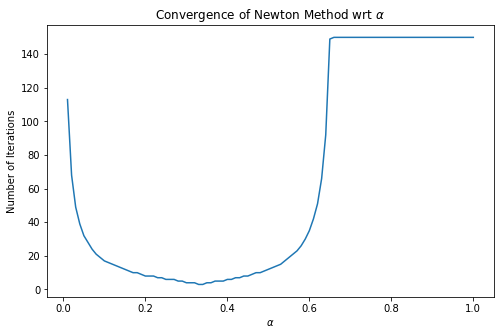

In [23]:
alpha = np.linspace(.01, 1, 100)
numiter = noalpha_one_dim_newton(f, .01, fprime, maxiter=150)
fig = plt.figure(figsize=(8,5))
plt.plot(alpha, numiter)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'Number of Iterations')
plt.title(r'Convergence of Newton Method wrt $\alpha$')
plt.show()

## Problem 5

In [27]:
def backtrk_newton(f, x0, Df, alpha=1, tol=1e-5, maxiter=15):
    
    diff = tol+1
    
    if np.isscalar(x0):
        return backtrk_one_dim_newton(f, x0, Df, alpha, tol, maxiter)
    else:
        for i in range(int(maxiter)):
            x1 = x0 - alpha * np.linalg.solve(Df(x0), f(x0))
            diff = norm(x1 - x0, np.inf)
            if (diff < tol):
                break
            x0 = x1
        return x1

In [28]:
root = backtrk_newton(f, 1, fprime, .4)
print('Root is: ', root)

Newton's algorithm converged
Root is:  -5.120000000000109e-07


## Problem 6

In [41]:
def newton_Rn_adjust(x0, f, Df, alpha=1, tol=1e-5, maxiter=15):
    
    for i in range(int(maxiter)):
        x1 = x0 - alpha * solve(Df(x0), f(x0))
        if (norm(x1 - x0) < tol):
            return x1
        x0 = x1
    
    return x1

In [42]:
f = lambda x: anp.array([5*x[0]*x[1] - x[0]*(1 + x[1]), 
                         -x[0]*x[1] + (1 - x[1])*(1 + x[1])])
Df = jacobian(f)

def find_init(f, Df, niter=100):
    # Create search domain
    x_domain = np.linspace(-0.25, 0, 100)
    y_domain = np.linspace(0, 0.25, 100)
    X, Y = np.meshgrid(x_domain, y_domain)
    xy_domain = zip(X.ravel(), Y.ravel())
    
    # See where each point in the domain converges
    for coord in xy_domain:
        try:
            min1 = newton_Rn_adjust(anp.array(coord), f, Df, alpha=1, maxiter=niter)
            min2 = newton_Rn_adjust(anp.array(coord), f, Df, alpha=0.55, maxiter=niter)
            if (np.allclose(min1, anp.array((0, 1))) or np.allclose(min1, anp.array((0, -1)))) and np.allclose(min2, anp.array((3.75, 0.25))):
                return coord
        except:
            pass

find_init(f, Df)

(-0.25, 0.196969696969697)

In [43]:
newton_Rn_adjust(anp.array((-0.25, 0.19696969696969699)), f, Df, alpha=1, maxiter=100)

array([-9.9901446e-23, -1.0000000e+00])

In [44]:
newton_Rn_adjust(anp.array((-0.25, 0.19696969696969699)), f, Df, alpha=0.55, maxiter=100)

array([3.75000599, 0.25000187])